# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

import requests
import json

import numpy as np
from scipy import stats as stats
import random
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
#Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
print("this may take a while  ")

In [4]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 : sosnogorsk
Processing Record 2 of Set 1 : mercedes
Processing Record 3 of Set 1 : itoman
Processing Record 4 of Set 1 : ushuaia
Processing Record 5 of Set 1 : new norfolk
Processing Record 6 of Set 1 : cidreira
Processing Record 7 of Set 1 : castro
Processing Record 8 of Set 1 : nouadhibou
Processing Record 9 of Set 1 : belmonte
Processing Record 10 of Set 1 : albany
Processing Record 11 of Set 1 : masuguru
Processing Record 12 of Set 1 : rikitea
Processing Record 13 of Set 1 : atuona
City not found. Skipping...
Processing Record 14 of Set 1 : hilo
Processing Record 15 of Set 1 : victoria
Processing Record 16 of Set 1 : cape town
Processing Record 17 of Set 1 : karatuzskoye
Processing Record 18 of Set 1 : staryy nadym
Processing Record 19 of Set 1 : malakal
Processing Record 20 of Set 1 : mecca
Processing Record 21 of Set 1 : punta arenas
Processing Record 22 of Set 1 : 

Processing Record 30 of Set 4 : esperance
Processing Record 31 of Set 4 : linqiong
Processing Record 32 of Set 4 : nguru
Processing Record 33 of Set 4 : kavieng
Processing Record 34 of Set 4 : agadir
Processing Record 35 of Set 4 : cayenne
Processing Record 36 of Set 4 : pangnirtung
City not found. Skipping...
Processing Record 37 of Set 4 : fortuna
Processing Record 38 of Set 4 : landau
Processing Record 39 of Set 4 : lagunas
Processing Record 40 of Set 4 : kaitangata
Processing Record 41 of Set 4 : beringovskiy
Processing Record 42 of Set 4 : alofi
Processing Record 43 of Set 4 : terrell
Processing Record 44 of Set 4 : thompson
City not found. Skipping...
Processing Record 45 of Set 4 : provideniya
Processing Record 46 of Set 4 : faanui
Processing Record 47 of Set 4 : hasaki
Processing Record 48 of Set 4 : hofn
Processing Record 49 of Set 4 : atasu
Processing Record 50 of Set 4 : smithers
Processing Record 0 of Set 5 : praia da vitoria
Processing Record 1 of Set 5 : bubaque
Processin

Processing Record 14 of Set 8 : icod de los vinos
Processing Record 15 of Set 8 : necochea
Processing Record 16 of Set 8 : bulungu
Processing Record 17 of Set 8 : narok
Processing Record 18 of Set 8 : shiyan
Processing Record 19 of Set 8 : anchorage
Processing Record 20 of Set 8 : oktyabrskiy
Processing Record 21 of Set 8 : masvingo
Processing Record 22 of Set 8 : raudeberg
Processing Record 23 of Set 8 : port lavaca
Processing Record 24 of Set 8 : holme
Processing Record 25 of Set 8 : puerto quijarro
Processing Record 26 of Set 8 : hobyo
Processing Record 27 of Set 8 : romitan
Processing Record 28 of Set 8 : mogadishu
Processing Record 29 of Set 8 : penaflor
Processing Record 30 of Set 8 : riverton
Processing Record 31 of Set 8 : bathsheba
Processing Record 32 of Set 8 : jinotega
Processing Record 33 of Set 8 : dedza
Processing Record 34 of Set 8 : chake chake
Processing Record 35 of Set 8 : abalak
Processing Record 36 of Set 8 : bastia
Processing Record 37 of Set 8 : prince george
Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
#Create a dataframe using information from data retrieval
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

In [51]:
weather_data.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [52]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sosnogorsk,63.6023,53.8817,19.17,82,76,7.02,RU,1636865487
1,Mercedes,-34.6515,-59.4307,64.18,98,100,6.04,AR,1636865487
2,Itoman,26.1247,127.6694,73.78,73,75,19.57,JP,1636865471
3,Ushuaia,-54.8000,-68.3000,42.55,85,100,0.92,AR,1636865165
4,New Norfolk,-42.7826,147.0587,52.92,57,100,8.99,AU,1636865208


In [53]:
weather_data.to_csv("output_data/cities.csv", index=False)

In [54]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.00000,557.000000,557.000000,557.000000,5.570000e+02
mean,18.578321,11.009370,56.20912,72.391382,58.741472,7.662657,1.636866e+09
std,34.278351,88.934374,24.31221,20.656086,38.206905,6.588740,2.091809e+02
min,-54.800000,-179.166700,-23.21000,7.000000,0.000000,0.000000,1.636865e+09
25%,-11.702200,-63.166700,40.21000,62.000000,20.000000,3.110000,1.636866e+09
50%,22.075200,15.640100,63.52000,76.000000,71.000000,5.770000,1.636866e+09
75%,47.666600,82.100000,76.46000,89.000000,96.000000,10.000000,1.636866e+09
max,78.218600,179.316700,98.58000,100.000000,100.000000,50.000000,1.636866e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
#skip ; max is 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

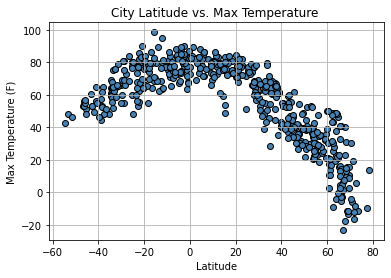

In [56]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

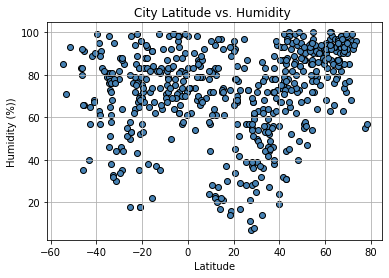

In [57]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity ")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("../Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

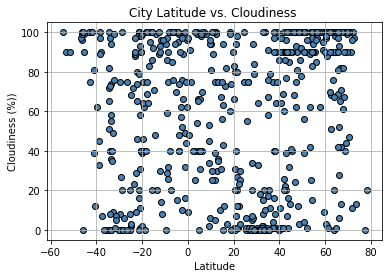

In [58]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(True)
plt.savefig("../Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

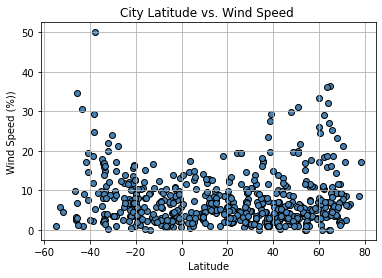

In [59]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig("../Latitude vs Wind Speed.png")

## Linear Regression

In [60]:
# find all countries in northen hempisphere
northern_hemp = weather_data[weather_data['Lat'] >= 0]

# find all countries in southern hempisphere
southern_hemp = weather_data[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\sanup\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:174: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\sanup\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


The correlation value is -0.89


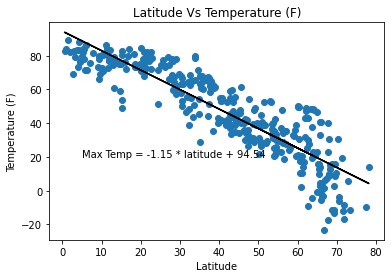

In [61]:
# store x and y values
y_values = northern_hemp['Max Temp'].astype(float)
x_values = northern_hemp['Lat'].astype(float)
# y_values
# store linear regression values
slope, intercept, r, p_value, std_error = stats.linregress([x_values],[y_values])

# equation
equation = f'Max Temp = {round(slope,2)} * latitude + {round(intercept,2)}'

# estimated values
lat_values = x_values
est_temp = slope*lat_values + intercept
print(f'The correlation value is {round(r,2)}')

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude Vs Temperature (F)')
plt.annotate(equation,(5,20))
plt.plot(lat_values,est_temp,color = 'black')
plt.savefig('Latitude Vs Temp (Northen)',facecolor='white', transparent=False)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation value is 0.68


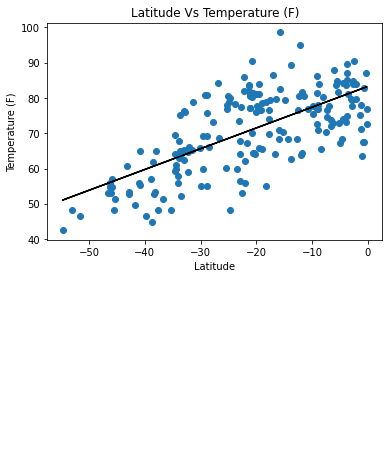

In [62]:
# store x and y values
y_values = southern_hemp['Max Temp'].astype(float)
x_values = southern_hemp['Lat'].astype(float)

# store linear regression values
slope, intercept, r, p_value, std_error = stats.linregress(x_values,y_values)

# equation
equation = f'temp = {round(slope,2)} * latitude + {round(intercept,2)}'

# estimated values
lat_values = x_values
est_temp = slope*lat_values + intercept
print(f'The correlation value is {round(r,2)}')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude Vs Temperature (F)')
plt.annotate(equation,(-45,-20))
plt.plot(lat_values,est_temp,color = 'black')
plt.savefig('Latitude Vs Temp (Southern)',facecolor='white', transparent=False)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation value is 0.41


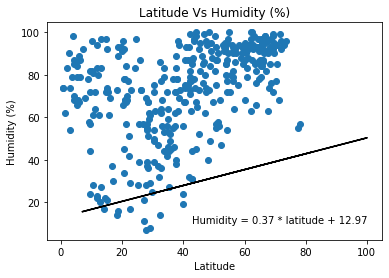

In [63]:
# store x and y values
y_values = northern_hemp['Lat'].astype(float)
x_values = northern_hemp['Humidity'].astype(float)

# store linear regression values
slope, intercept, r, p_value, std_error = stats.linregress(x_values,y_values)

# equation
equation = f'Humidity = {round(slope,2)} * latitude + {round(intercept,2)}'

# estimated values
lat_values = x_values
est_hum = slope*lat_values + intercept
print(f'The correlation value is {round(r,2)}')
plt.scatter(y_values,x_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude Vs Humidity (%)')
plt.annotate(equation,(43,10))
plt.plot(lat_values,est_hum,color = 'black')
plt.savefig('Latitude Vs Humidty (Northern)',facecolor='white', transparent=False)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation value is 0.13


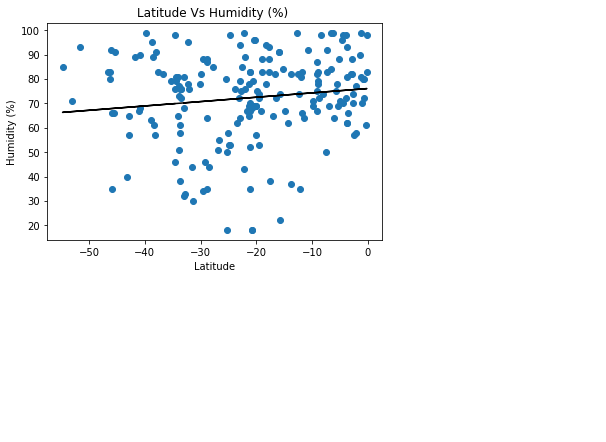

In [64]:

# store x and y values
x_values = southern_hemp['Lat'].astype(float)
y_values = southern_hemp['Humidity'].astype(float)

# store linear regression values
slope, intercept, r, p_value, std_error = stats.linregress(x_values,y_values)

# equation
equation = f'Humidity = {round(slope,2)} * latitude + {round(intercept,2)}'

# estimated values
lat_values = x_values
est_hum = slope*lat_values + intercept
print(f'The correlation value is {round(r,2)}')
plt.scatter(x_values,y_values)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude Vs Humidity (%) ')
plt.annotate(equation,(10,-65))
plt.plot(lat_values,est_hum,color = 'black')
plt.savefig('Latitude Vs Humidty (Southern)',facecolor='white', transparent=False)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation value is 0.29


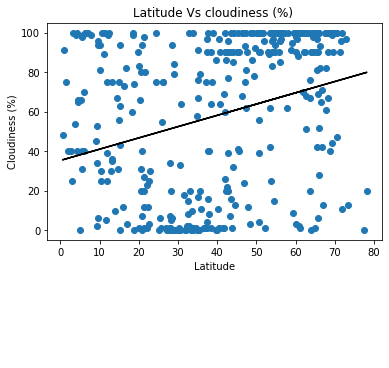

In [66]:
# store x and y values
x_values = northern_hemp['Lat'].astype(float)
y_values = northern_hemp['Cloudiness'].astype(float)

# store linear regression values
slope, intercept, r, p_value, std_error = stats.linregress(x_values,y_values)

# equation
equation = f'Cloudinesss = {round(slope,2)} * latitude + {round(intercept,2)}'

# estimated values
lat_values = x_values
est_hum = slope*lat_values + intercept
print(f'The correlation value is {round(r,2)}')

plt.scatter(x_values,y_values)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude Vs cloudiness (%) ')
plt.annotate(equation,(10,-65))
plt.plot(lat_values,est_hum,color = 'black')
plt.savefig('Latitude Vs cloudiness (Northern)',facecolor='white', transparent=False)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation value is 0.09


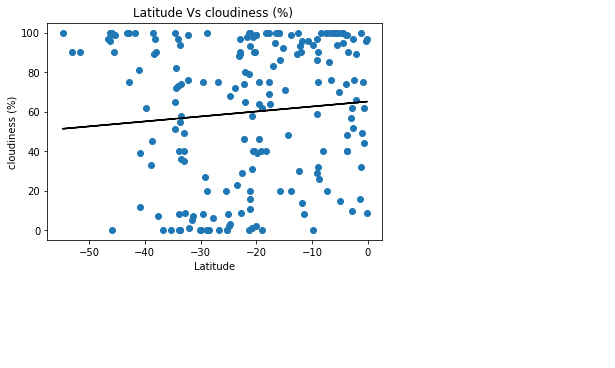

In [68]:
# store x and y values
x_values = southern_hemp['Lat'].astype(float)
y_values = southern_hemp['Cloudiness'].astype(float)

# store linear regression values
slope, intercept, r, p_value, std_error = stats.linregress(x_values,y_values)

# equation
equation = f'Cloudiness = {round(slope,2)} * latitude + {round(intercept,2)}'

# estimated values
lat_values = x_values
est_hum = slope*lat_values + intercept
print(f'The correlation value is {round(r,2)}')

plt.scatter(x_values,y_values)
plt.ylabel('cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude Vs cloudiness (%) ')
plt.annotate(equation,(10,-65))
plt.plot(lat_values,est_hum,color = 'black')
plt.savefig('Latitude Vs cloudiness (Southern)',facecolor='white', transparent=False)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation value is 0.15


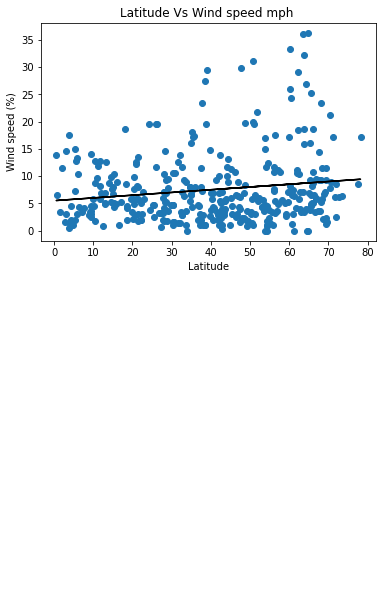

In [71]:
# store x and y values
x_values = northern_hemp['Lat'].astype(float)
y_values = northern_hemp['Wind Speed'].astype(float)

# store linear regression values
slope, intercept, r, p_value, std_error = stats.linregress(x_values,y_values)

# equation
equation = f'Wind Speed = {round(slope,2)} * latitude + {round(intercept,2)}'

# estimated values
lat_values = x_values
est_hum = slope*lat_values + intercept
print(f'The correlation value is {round(r,2)}')

plt.scatter(x_values,y_values)
plt.ylabel('Wind speed (%)')
plt.xlabel('Latitude')
plt.title('Latitude Vs Wind speed mph ')
plt.annotate(equation,(10,-65))
plt.plot(lat_values,est_hum,color = 'black')
plt.savefig('Latitude Vs wind (Northern)',facecolor='white', transparent=False)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation value is -0.3


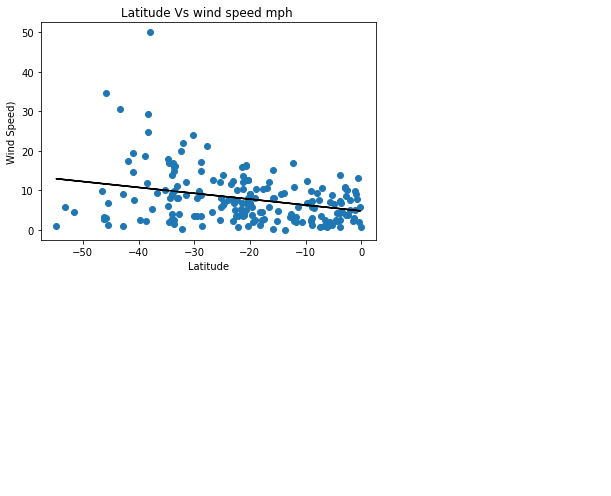

In [72]:
# store x and y values
x_values = southern_hemp['Lat'].astype(float)
y_values = southern_hemp['Wind Speed'].astype(float)

# store linear regression values
slope, intercept, r, p_value, std_error = stats.linregress(x_values,y_values)

# equation
equation = f'Wind Speed = {round(slope,2)} * latitude + {round(intercept,2)}'

# estimated values
lat_values = x_values
est_hum = slope*lat_values + intercept
print(f'The correlation value is {round(r,2)}')

plt.scatter(x_values,y_values)
plt.ylabel('Wind Speed)')
plt.xlabel('Latitude')
plt.title('Latitude Vs wind speed mph ')
plt.annotate(equation,(10,-65))
plt.plot(lat_values,est_hum,color = 'black')
plt.savefig('Latitude Vs wind (Southern)',facecolor='white', transparent=False)
plt.show()